# Different values of Pi

The constant $\pi = 3.1415... $ and there isn't much we can do about that. However, if we consider $$pi = \frac{C}{d}$$ where $C$ is the circumference of a circle and $d$ its diameter, then things can get more interesting.

## Step 1: A "normal" circle

The circumference are all the points that lie on the edge of a circle. If we consider the unit circle in our normal euclidean space we can calculate it as $$(x,y) \text{ is on the circle if } \sqrt{x^2 + y^2} \le 1$$
We can render this something like this:

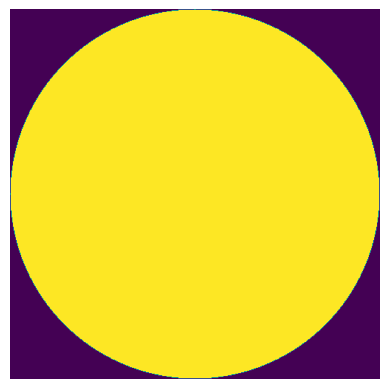

In [35]:
from matplotlib import pyplot as plt
from math import sqrt

resolution = 250
circle = np.zeros((resolution*2+1, resolution*2+1))
res_squared = resolution * resolution

for x in range(-resolution, resolution):
    for y in range(-resolution, resolution):
        norm_x = x / resolution
        norm_y = y / resolution
        if sqrt(norm_x*norm_x + norm_y*norm_y) <= 1:
            circle[x+resolution][y+resolution] = 1

fig = plt.imshow(circle)
axis = plt.axis('off')

# Manhattan

In the Manhattan or [Taxi Cab metric](https://en.wikipedia.org/wiki/Taxicab_geometry) you can only move along the $x$ or $y$ coordiante. Before we look at the circle in the taxi cab metric we need to generalize our definition of a circle a bit:

$$(x,y) \text{ is on the circle if } d(x, y) \le 1$$

where $d(x,y)$ is a distance metric. If we place in the Taxi Cab metric we arrive at:

$$(x,y) \text{ is on the circle if } \lvert x \lvert + \lvert y \lvert \le 1$$

Which leads to a circle that looks like this:

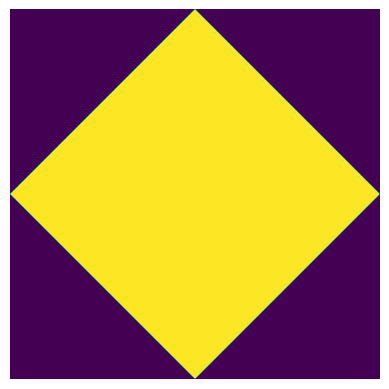

In [36]:
from matplotlib import pyplot as plt
from math import sqrt

resolution = 250
circle = np.zeros((resolution*2+1, resolution*2+1))
res_squared = resolution * resolution

for x in range(-resolution, resolution):
    for y in range(-resolution, resolution):
        norm_x = x / resolution
        norm_y = y / resolution
        if abs(norm_x)+ abs(norm_y) <= 1:
            circle[x+resolution][y+resolution] = 1

fig = plt.imshow(circle)
axis = plt.axis('off')

At first glance one might think the circumference of the circle here is $4 * \sqrt{2}$ which would be the sum of diagonals but in a taxi cab world we can only go along $x$ or $y$ coordinates which means we'll actually have to move a distance of $2$ for each diagonal step:

![Distance](https://uploads-cdn.omnicalculator.com/images/manhattan_distance.png?width=425&enlarge=0&format=webp)

Which means the circumference of the unit circle is $4 * 2$ which in turn means 

$$\pi = 8 / 2 = 4$$



# $L^{P}$-Norms

$L^{P}$-Norms are distance metrics. We calculate them for a vector $x$ as follows:

$$L^{P} = \left(\sum_{n}{\lvert x_{n} \lvert^{p}}\right)^{1/p}$$

Euclidean distances is $L^{2}$ and Manhattan distance is $L^{1}$.

This means we can render the unit circles under the $L^{P}$-Norms for higher values of $P$ as well.

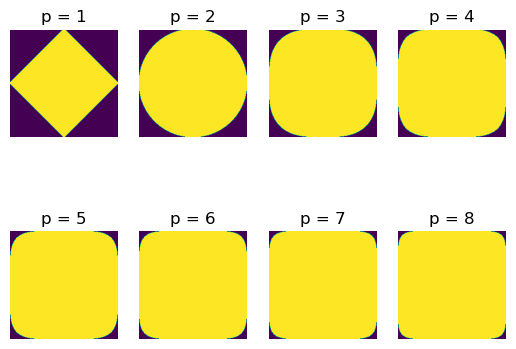

In [22]:
from matplotlib import pyplot as plt
import scipy.spatial.distance as distance
import numpy as np

def render_lp_circle(p, resolution=250):
    circle = []
    for x in range(0, resolution, 1):
        row = []
        for y in range(0, resolution, 1):
            X = np.array([[0,0], [x/resolution,y/resolution]])
            row.append(distance.pdist(X, 'minkowski', p=p)[0] <= 1)
        circle.append(row)
    # We just render a quarter of the circle and flip it twice to make it a bit faster
    circle = np.concatenate((np.flip(circle, axis=1), circle), axis=1) 
    circle = np.concatenate((np.flip(circle, axis=0), circle), axis=0)
    return circle

fig, axs = plt.subplots(2, 4)
for row in range(2):
    for col in range(4):
        p = row*4+col+1
        axs[row][col].imshow(render_lp_circle(p, 100))
        axs[row][col].axis('off')
        axs[row][col].set_title(f'p = {p}')


As it turns out $P$ does not have to be an integer and you can calculate $pi$ for all these circles on a continuuum [^1] resulting in something like this [^2]:

![LPPi](https://blogs.sas.com/content/iml/files/2019/03/LpCircles2.png)

[^1]: https://www.jstor.org/stable/2687579
[^2]: https://blogs.sas.com/content/iml/2019/03/13/pi-in-lp-metric.html

# Down to earth

If you were to stand outside in a parking lot and draw a cricle around yourself with radius $1$m, how large would the circumference be? If you say $2 * \pi$ you might be a flat-earther. To illustrate the point, let's say I had asked you to stand at the north-pole and draw a circle with radius $10.000$km. Assuming the earth is a perfect ball, you'd be drawing a line along the equator, which is $40.000$km. So, coming back to our formula $pi = \frac{C}{d}$ we see that

$$pi = \frac{40.0000}{10.000 * 2} = 2$$

And if you were to draw a circle with radius $20.000$ while standing on the north-pole you'd be drawing a single dot on the south-pole arriving at $pi = 0$

![Sphere](sphere.png)